# Homework 8: Regexes and Structured Data (35 points)
name: Yifeng He

email: yifengh@umich.edu

I didn't discusse this homework with anyone. (List *everyone* with whom you discussed any of the homework problems, excluding only the GSIs and the course instructor. If you did not discuss the homework with anyone else, write "I did not discuss this homework with anyone." Even if you discuss questions with other, the code you submit must be only yours. All work is checked with the [MOSS plagiarism detector](https://theory.stanford.edu/~aiken/moss/).)

This homework assignment took me 8 hours in total to complete. (Please help us to gauge the difficulty of the assignment.)

### Submission Instructions
Your homework solutions should be written entirely in this Jupyter notebook file. Once it contains your solutions, you should submit this notebook through Canvas. Before submitting, please make sure make sure __Cells->Run__ executes without errors; errors in your code cause problems for our auto-grader. Thus, even though we may ask you to check for errors in your functions, you should not include in your submission any examples of your functions actually raising those errors.

### Coding style
Please follow the [PEP8 guidelines](https://www.python.org/dev/peps/pep-0008/). The `pycodestyle_magic` package will remind you if you are not. To install it, run
```
pip install flake8 pycodestyle_magic
```
Once it is installed the following two Jupyter directives will enable syntax checking:

In [1]:
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
import sqlite3
import re
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
from urllib.error import HTTPError
import random
import sqlite3

In [3]:
from urllib import request
from os import path
from zipfile import ZipFile

url = "https://regier.stat.lsa.umich.edu/stats507/"
fn = "hw8data.zip"
if not path.exists(fn):
    data = request.urlopen(url + fn).read()
    with open(fn, 'wb') as fhand:
        fhand.write(data)
    with ZipFile(fn, 'r') as zipObj:
        zipObj.extractall()

## 1 Regular Expressions: Warmup (8 points)

In this problem, you'll get practice with basic regular expressions. Pay particular attention to edge cases such as the empty string
and single-character strings when writing your regexes. At the URL http://www.greenteapress.com/thinkpython/code/words.txt is a list of about 100,000 English words.

1. Use __urllib__ to open the URL and read the file, and produce a list of ASCII strings so that each line of the file corresponds to an element of the list. You will likely need to convert the raw bytes read from the webpage to ASCII characters, for which you should see the documentation for the string methods __encode__ and __decode__. How many words are in the file?<br>

In [4]:
data_one = request.urlopen(
    "http://www.greenteapress.com/thinkpython/code/words.txt"
).read()
res = []
med = []
for item in data_one:
    if chr(item) != "\n" and chr(item) != "\r":
        med.append(chr(item))
    elif len(med) != 0:
        res.append("".join(med))
        med = []
print(len(res))

113809


Thre are **113809** words in the file

2. It is a good habit to always look at your data to check that it makes sense. Have a look at the words in the list. Does anything jump out at you? __Note:__ I am not requiring you to do anything specific, here. Just look at the data!

In [6]:
print(res[:500])

['aa', 'aah', 'aahed', 'aahing', 'aahs', 'aal', 'aalii', 'aaliis', 'aals', 'aardvark', 'aardvarks', 'aardwolf', 'aardwolves', 'aas', 'aasvogel', 'aasvogels', 'aba', 'abaca', 'abacas', 'abaci', 'aback', 'abacus', 'abacuses', 'abaft', 'abaka', 'abakas', 'abalone', 'abalones', 'abamp', 'abampere', 'abamperes', 'abamps', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abandonments', 'abandons', 'abas', 'abase', 'abased', 'abasedly', 'abasement', 'abasements', 'abaser', 'abasers', 'abases', 'abash', 'abashed', 'abashes', 'abashing', 'abasing', 'abatable', 'abate', 'abated', 'abatement', 'abatements', 'abater', 'abaters', 'abates', 'abating', 'abatis', 'abatises', 'abator', 'abators', 'abattis', 'abattises', 'abattoir', 'abattoirs', 'abaxial', 'abaxile', 'abbacies', 'abbacy', 'abbatial', 'abbe', 'abbes', 'abbess', 'abbesses', 'abbey', 'abbeys', 'abbot', 'abbotcies', 'abbotcy', 'abbots', 'abbreviate', 'abbreviated', 'abbreviates', 'abbreviating', 'abbreviation', 'abbreviations', 'abdica

**They are all english words, and are in a to z sequence. In other words, it is sorted by increasing ASCII values.**

3. Write a regular expression that matches any string containing exactly three consecutive vowels. Compile this regular expression, and assign it to a variable called `three_consecutive_vowels`. Use this regex to determine how many words from the list contain exactly three consecutive vowels. For the purposes of this __specific__ subproblem, the vowels are __a, e, i, o, u__. All other letters are consonants. Produce a list of all such words.

In [6]:
three_consecutive_vowels = re.compile(r'(^[aeiou]{3}$)|(^[aeiou]{3}[^aeiou])'
                                      r'|([^aeiou][aeiou]{3})$'
                                      r'|([^aeiou][aeiou]{3}[^aeiou])'
                                      r'|([^aeiou]+[aeiou]{3}[^aeiou]+)')

In [7]:
print(three_consecutive_vowels.match("aei").group(0) == 'aei')
print(three_consecutive_vowels.match("uiuu") is None)

True
True


In [8]:
sum([three_consecutive_vowels.search(w) is not None for w in res])

1326

**There are 1326 words from the list that contain exactly three consecutive vowels**

4. Write a regular expression that matches any string that contains no instances of the letter e. Compile this regular expression, and assign it to a variable called `gadsby`. (__Gadsby__ is the title of an English novel written in the 1930s that contains __almost__ no instances of the letter e). How many words in the list do not contain the letter e?

In [9]:
gadsby = re.compile(r'^[^e]+$')

In [10]:
print(gadsby.match("stats").group(0) == 'stats')
print(gadsby.match("state") is None)

True
True


In [11]:
print(sum([gadsby.search(w) is not None for w in res]))

37641


**There are 37641 words from the list that contain no instance of the letter e**

5. Write a regular expression that matches any string that begins and ends with a consonant and has no consonants in between. For the purposes of this __specific__ subproblem, y is neither consonant nor vowel,so consonants are the 20 letters that are not one of __a, e, i, o, u, y__ and vowels are __a, e, i, o, u__. The words need not begin and end with the _same_ consonant, so _door_ is a valid match. Compile this regular expression, and assign it to a variable called `consonant_consonant`. How many words begin and end with a consonant with no consonants in between?

In [12]:
consonant_consonant = re.compile(r'^[^aeiouy]([aeiouy]*)[^aeiouy]$')

In [13]:
print(consonant_consonant.match("door").group(0) == 'door')
print(consonant_consonant.match("stats") is None)

True
True


In [14]:
print(sum([consonant_consonant.search(w) is not None for w in res]))

1230


**There are 1230 words from the list that begin and end with a consonant with no consonants in between**

6. Write a regular expression that matches any string whose last two characters are the first two characters in reverse order. So, for example, your regex should match _repeater_ and _stats_, but not _neoprene_. Compile this regular expression and assign it to a variable called `bookends`. How many words in the list have this property?
__Hint:__ Be careful of the cases in which the word is length less or equal to 3. You may handle the case of a single character (e.g., _a_), as you like, but please give an explanation for your choice.

In [15]:
bookends = re.compile(r'^(\w)\w\1$|^(\w)\2$|^(\w)(\w)\w+\4\3$')

In [16]:
print(bookends.match("repeater").group(0) == 'repeater')
print(bookends.match("neoprene") is None)

True
True


In [17]:
print(sum([bookends.search(w) is not None for w in res]))

875


**For the single character, it is not included, since it does not have at least two characters for comparison** 

## 2 Exploring Internet Traffic with Regexes (7 points)

In this problem, you'll get a taste of a more realistic application of regular expressions. The file __SkypeIRC.txt__ contains data generated by web traffic associated with Skype and IRC, captured using the Wireshark program, a common tool for analyzing web traffic. The original data file can be found on the Wireshark wiki, https://wiki.wireshark.org/SampleCaptures, but please use the file provided on my website for this assignment.

1. Each line of `SkypeIRC.txt` corresponds to a single packet sent over the internet. How many packets are in this file? Save the answer in a variable `n_packets`.

In [18]:
url = "https://regier.stat.lsa.umich.edu/stats507/"
fn = "hw8data.zip"
if not path.exists(fn):
    data = request.urlopen(url + fn).read()
    with open(fn, 'wb') as fhand:
        fhand.write(data)
    with ZipFile(fn, 'r') as zipObj:
        zipObj.extractall()

In [19]:
file_name = "SkypeIRC.txt"
fhand = open(file_name, encoding='utf-8')
count = 0
for line in fhand:
    count += 1
print(count)

2263


In [20]:
n_packets = count

2. Use regular expressions to extract all the IP addresses from the file and collect them in a Python list. An IP address consists of four numbers, which are displayed as __A.B.C.D__ where __A, B, C__ and __D__ are each numbers between 0 and 255 inclusive. How many unique IP addresses appear in the data set? Save the answer in a variable `ip_addresses`. __Note:__ There are a few pieces of text in the file that _look_ like IP addresses but aren't (e.g., they are of the form A.B.C.D, but one or more of A, B, C and D are outside the range 0 to 255). You should try to craft a regex that matches as few of these as you can, but of course it will not be possible to avoid certain edge cases.

In [21]:
file_name = "SkypeIRC.txt"
fhand = open(file_name, encoding='utf-8')
content = fhand.read()
checkIP = re.compile(r'((25[0-5]|2[0-4][0-9]|1[0-9][0-9]|[1-9]?[0-9])'
                     r'\.(25[0-5]|2[0-4][0-9]|1[0-9][0-9]|[1-9]?[0-9])'
                     r'\.(25[0-5]|2[0-4][0-9]|1[0-9][0-9]|[1-9]?[0-9])'
                     r'\.(25[0-5]|2[0-4][0-9]|1[0-9][0-9]|[1-9]?[0-9]))')
print(len(set(checkIP.findall(content))))

368


In [22]:
ip_addresses = len(set(checkIP.findall(content)))

3. Write a function called `get_packets_by_regex` that takes a single string as its argument and returns a list of all the lines from the input file that match the input string interpreted as a regular expression. So, for example, `get_packets_by_regex(r'comcast')` will return all lines from the file containing the string _'comcast'_. Your function should check that the input is a string.

In [23]:
def get_packets_by_regex(input_str):
    if not isinstance(input_str, str):
        raise TypeError("Input should be in string type")
    file_name = "SkypeIRC.txt"
    fhand = open(file_name, encoding='utf-8')
    check = re.compile(input_str)
    res = []
    for line in fhand:
        if check.search(line):
            res.append(line)
    return res

In [24]:
len(get_packets_by_regex(r'114.214.204.212')) == 2

True

4. The second piece of text (i.e., non-whitespace) on each line is a time stamp, counting the time (in seconds) since the beginning of the traffic recording. Using _matplotlib_, create a plot displaying how many packets appeared in each second of the recording. A histogram or line plot is the most obvious way to do this, but you should feel free to use a more creative way of displaying this information if you wish to do so. Save your plot as a PDF, in a file called _timestamps.pdf_. This file does not need to be including in your submission. __Note:__ in case it wasn't obvious, there is no need to use a regular expression for this subproblem if you do not want to.

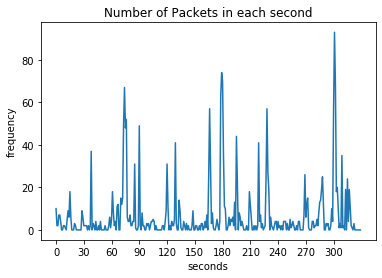

In [25]:
file_name = "SkypeIRC.txt"
fhand = open(file_name, encoding='utf-8')
record = dict()
res = []
for line in fhand:
    timestamp = line.split()
    check = re.compile(r'\d+')
    tmp = check.findall(timestamp[1])
    res.append(tmp[0])
record = dict()
for i in range(330):
    record[str(i)] = 0
for item in res:
    record[item] += 1
x_data = []
y_data = []
for key, value in record.items():
    x_data.append(key)
    y_data.append(value)
plt.plot(x_data, y_data)
plt.ylabel('frequency')
plt.xlabel('seconds')
plt.title('Number of Packets in each second')
plt.xticks(np.arange(0, 330, step=30))
plt.savefig('timestamps.pdf')
plt.show()

## 3 Retrieving Data from the Web (10 points)
In this problem, we'll scrape data from Wikipedia using __BeautifulSoup__. Documentation for BeauitfulSoup can be found at https://www.crummy.com/software/BeautifulSoup/bs4/doc/. As mentioned in lecture, there is another package, called __requests__, which is becoming quite popular, which you are welcome to use for this problem instead, if you wish. Documentation for the `requests` package can be found at https://requests.readthedocs.io/en/master/ .

Suppose you are trying to choose a city to vacation in. A major factor in your decision is weather. Conveniently, lots of weather information is present in the Wikipedia articles for most world cities. Your job in this problem is to use __BeautifulSoup__ to retrieve weather information from Wikipedia articles. We should note that in practice, such information is typically more easily obtained from, for example, the National Oceanic and Atmospheric Administration (NOAA), in the case of cities in the United States, and from analogous organizations in other countries.

1. Look at a few Wikipedia pages corresponding to cities. For example:
 - https://en.wikipedia.org/wiki/Ann_Arbor,_Michigan
 - https://en.wikipedia.org/wiki/Buenos_Aires
 - https://en.wikipedia.org/wiki/Harbin

 Note that most city pages include a table titled something like "Climate data for [Cityname] (normals YYYY-YYYY, extremes YYYY-YYYY)". Find a Wikipedia page for a city that includes such a table (such as one of the three above). In your jupyter notebook, open the URL and read the HTML using either __urllib__ or __requests__, and parse it with __BeautifulSoup__ using the standard parser, __html.parser__. Have a look at the parsed HTML and find the climate data table, which will have the tag __table__ and will contain a child tag __th__ containing a string similar to

 Climate data for [Cityname] (normals YYYY-YYYY, extremes YYYY-YYYY)}.

 Find the node in the __BeautifulSoup__ object corresponding to this table. Describe the structure of this node of the tree (e.g., how many children does the table have, what are their tags, etc. A sentence or two is fine, here). You may want to learn a bit about the structure of HTML tables by looking at the resources available on these websites:
 - https://developer.mozilla.org/en-US/docs/Web/HTML/Element/table
 - https://www.w3schools.com/html/html_tables.asp
 - https://www.w3.org/TR/html401/struct/tables.html

In [26]:
file_three = request.urlopen(
    "https://en.wikipedia.org/wiki/Madison,_Wisconsin")
parsed = BeautifulSoup(file_three, 'html.parser')
target = parsed.find('table', class_='wikitable collapsible')

In [27]:
for t in target.children:
    print(t.name)

None
tbody


In [28]:
count = 0
check = False
for t in target.tbody.children:
    if t.name is not None:
        count += 1
        if not check:
            print(t.name)
            check = True
print(count)

tr
16


**From the results above, we could see that in the wisonsin page, there is only one child of table, and its tag is "ytbody". For "tbody" tag, it has 16 children in total, which are all in "tr" tag**

2. Write a function `retrieve_climate_table` that takes as its only argument a Wikipedia URL, and returns the __BeautifulSoup__ object corresponding to the climate data table (if it exists in the page) and returns __None__ if no such table exists on the page. You should check that the URL is retrieved successfully, and raise an error if __urllib2__ fails to successfully read the website. You may notice that some city pages include more than one climate data table or several nested tables (see, for example, https://en.wikipedia.org/wiki/Los_Angeles). In this case, your function may arbitrarily choose one of the tables to return as a __BeautifulSoup__ object. __Note:__ a good way to check for edge cases is to test your script on the Wikipedia pages for a few of your favorite cities. The pages for Los Angeles, Hyderabad and Boston will give good examples of edge cases that you should be able to handle, but note that these are by no means exhaustive of all the possible edge cases. __Hint:__ make use of the __contents__ attribute of the __BeautifulSoup__ objects and the ability to change the elements of the contents list to Unicode.

In [29]:
def retrieve_climate_table(url):
    if not isinstance(url, str):
        raise TypeError('url should be in string type')
    try:
        file = request.urlopen(url)
    except HTTPError:
        raise BaseException('Check the url address')
    parsed = BeautifulSoup(file, 'html.parser')
    target = parsed.find_all('table')
    pattern = re.compile(r'Climate data for')
    res = []
    for tb in target:
        if pattern.search(tb.encode('utf-8').decode('utf-8')):
            res.append(tb)
    if len(res) == 0:
        return None
    else:
        return res[random.randint(0, len(res)-1)]

3. As you look at some of the climate data tables, you may notice that different cities' tables contain different information. For example, not all cities include snowfall data. Write a function `list_climate_table_row_names` that takes as its only argument a Wikipedia URL and returns a list of the row names of the climate data table, or returns __None__ if no such table exists. The list returned by your function should, ideally, consist solely of Python strings (either Unicode or ASCII), and should not include any __BeautifulSoup__ objects or HTML (__Hint:__ see the __BeautifulSoup__ method `get_text()`). The list returned by your script should _not_ include an entry corresponding to the __Climate data for...__ row in the table. __Second hint:__ you are looking for HTML table header (__th__) objects. The HTML attribute `scope` is your friend here, because in the context of an HTML table it tells you when a `th` tag is the header of a row or a column.

In [30]:
def list_climate_table_row_names(url):
    cltable = retrieve_climate_table(url)
    if cltable:
        return [line.get_text().strip()
                for line in cltable.find_all('th', scope='row')]
    else:
        return None

4. The next natural step would be to write a function that takes a URL and a row name and retrieves the data from that row of the climate data table (if the table exists and has that row name). Doing this would require some complicated string wrangling to get right, so I'll spare you the trouble. Instead, please __briefly__ describe either in pseudo code or in plain English how you would accomplish this, using the two functions you wrote above and the tools available to you in the __BeautifulSoup__ package. __Note:__ just to be clear, you __do not__ have to write any Python code for this last step.

**Answer:** 

Firstly, we should apply the function retrieve_climate_table() to get the climate data table. If the climate data table exists,then we could use list_climate_table_row_names() to get the list of row names from that climate data table. If the list contains those row names from the function argument, we could trace back to find those row names' parents in HTML file, which are in "tr" tag. After that, we could write a function that is similar to the list_climate_table_row_names() that will retrieve the data from that row of the climate data table, which are in "td" tag.  

## 4 Relational Databases and SQL (10 points)
In this problem, you'll interact with a toy SQL database using Python's built-in __sqlite3__ package. Documentation can be found at https://docs.python.org/3/library/sqlite3.html. For this problem, we'll use a popular toy SQLite database, called Chinook, which represents a digital music collection. See the documentation at
 
 https://github.com/lerocha/chinook-database/blob/master/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite

 for a more detailed explanation. We'll use the __.sqlite__ file __Chinook\_Sqlite.sqlite__, which you downloaded above.

1. Load the database using the Python __sqlite3__ package. How many tables are in the database? Save the answer in the variable `n_tables`.

In [31]:
conn = sqlite3.connect('Chinook_Sqlite.sqlite')
c = conn.cursor()
c.execute('''select * from sqlite_master where type='table' ''')
table = c.fetchall()
len(table)

11

In [32]:
n_tables = len(table)

2. What are the names of the tables in the database? Save the answer as a list of strings, `table_names`. __Note:__ you should write Python __sqlite3__ code to answer this; don't just look up the answer in the documentation!

In [33]:
c.execute('''select name from sqlite_master where type='table' ''')
table_name = c.fetchall()
print([item[0] for item in table_name])

['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


In [34]:
table_names = [item[0] for item in table_name]

3. Write a function `list_album_ids_by_letter` that takes as an argument a single character and returns a list of the primary keys of all the albums whose titles start with that character. Your function should ignore case, so that the inputs `a` and `A` yield the same results. Include error checking that raises an error in the event that the input is not a single character.

In [35]:
def list_album_ids_by_letter(char):
    if not isinstance(char, str):
        raise TypeError("Input should be in string type")
    elif len(char) != 1:
        raise ValueError("Input should be a single character")
    elif not char.isalpha():
        raise ValueError("Input should a word")
    else:
        c.execute("select AlbumID, Title from Album")
        res = [info for info in c.fetchall()]
        return [x[0] for x in res if x[1][0].lower() == char.lower()]

In [36]:
list_album_ids_by_letter('z') == [240]

True

4. Write a function `list_song_ids_by_album_letter` that takes as an argument a single character and returns a list of the primary keys of all the songs whose album names begin with that letter. Again, your function should ignore case and perform error checking as in `list_album_ids_by_letter`. (again ignoring case). __Hint:__ You'll need a JOIN statement here. Don't forget that you can use the `cursor.description` attribute to find out about tables and the names of their columns.

In [37]:
def list_song_ids_by_album_letter(char):
    if not isinstance(char, str):
        raise TypeError("Input should be in string type")
    elif len(char) != 1:
        raise ValueError("Input should be a single character")
    elif not char.isalpha():
        raise ValueError("Input should a word")
    else:
        c.execute('''select TrackID, Title
                    from Album
                    inner join Track
                    on Album.AlbumID = Track.AlbumID
                    ''')
        res = [info for info in c.fetchall()]
        return [x[0] for x in res if x[1][0].lower() == char.lower()]

In [38]:
list_song_ids_by_album_letter('z') == [3028, 3029, 3030, 3031,
                                       3032, 3033, 3034, 3035,
                                       3036, 3037]

True

5. Write a function `total_cost_by_album_letter` that takes as an argument a single character and returns the cost of buying every song whose album begins with that letter. This cost should be based on the tracks' unit prices, so that the cost of buying a set of tracks is simply the sum of the unit prices of all the tracks in the set. Again your function should ignore case and perform appropriate error checking.

In [39]:
def total_cost_by_album_letter(char):
    if not isinstance(char, str):
        raise TypeError("Input should be in string type")
    elif len(char) != 1:
        raise ValueError("Input should be a single character")
    elif not char.isalpha():
        raise ValueError("Input should a word")
    else:
        c.execute('''
                    select title, unitprice
                    from album
                    inner join track
                    on album.albumID = track.albumID
                    ''')
        res = [info for info in c.fetchall()]
        return sum([x[1] for x in res if x[0][0].lower() == char.lower()])

In [40]:
total_cost_by_album_letter('z') == 9.9

True